In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error

import pickle

from utils.data_utils import *

In [3]:
def which_date(index): # 給 test data 的 Index，計算是2019的哪一天
    days = index + 7

    # 設定基準日期為2019年1月1日
    base_date = datetime(2019, 1, 1)
    
    # 計算天數的 timedelta
    delta = timedelta(days=days)
    
    # 加上 timedelta 以獲得對應的日期
    result_date = base_date + delta
    formatted_date = result_date.strftime("%Y/%m/%d")

    # 返回結果
    return formatted_date

# NYC 所有時間

In [10]:
load = pd.read_pickle("/home/hchuang/Documents/UQ-DL/SSSD/src/datasets/NYISO/pickle/load.pickle")  
df = load[(load['Zone']=='N.Y.C.') & (load['Date']<='2019-12-31 23:00:00')]
# df = load[load['Date']<='2019-12-31 23:00:00']
df.head(2)

,Date,Load,Zone
8,2006-02-06 00:00:00,4636.4,N.Y.C.
19,2006-02-06 01:00:00,4415.4,N.Y.C.


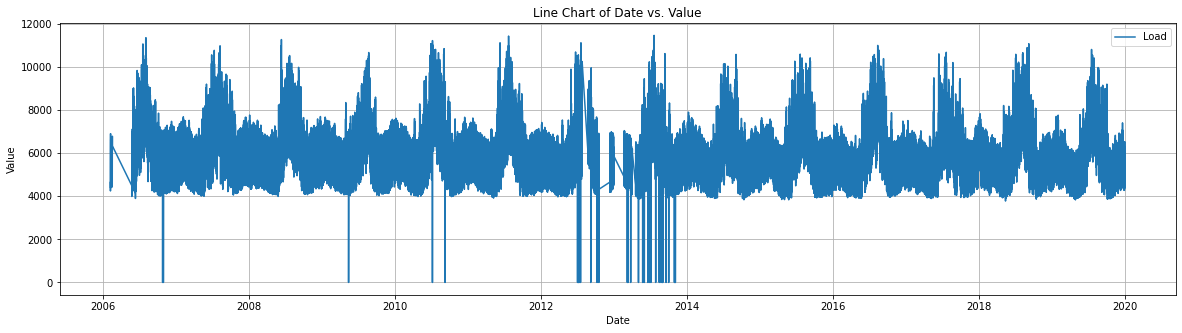

In [11]:
plt.figure(figsize=(20, 5))
plt.plot(df['Date'], df['Load'], linestyle='-', label = 'Load')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Line Chart of Date vs. Value')
plt.legend()
plt.grid(True)
plt.show()

<AxesSubplot:title={'center':'N.Y.C.'}, xlabel='Date'>

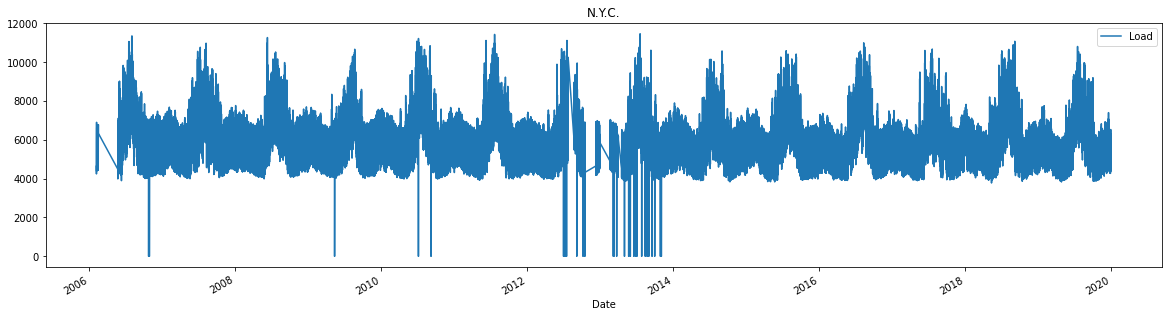

In [12]:
df.plot(x = 'Date', y = 'Load', figsize=(20,5), title = 'N.Y.C.')

# NYC 切割成一週後

In [2]:
def plot_data(data, index, zone_num, zone_name):
    data = data[index,:,zone_num:(zone_num+1)]
    data = np.squeeze(data, axis=2)
    df = pd.DataFrame(data).T
    df.plot(legend=False, title=zone_name, figsize=(20,5))

(4418, 192, 1)


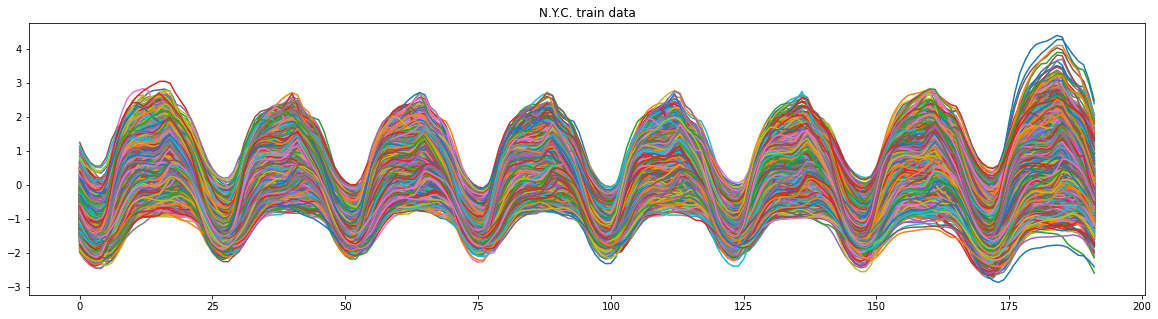

In [3]:
# data = np.load('load_array_all_train.npy')
# plot_data(data, range(0,4423,1), 8, "8 N.Y.C.")
# plot_data(data, range(0,1,1), 8, "2006/5/24-2019/5/30")
# plot_data(data, range(31,32,1), 8, "2006/6/24-2019/6/30")

data = np.load('/home/hchuang/Documents/UQ-DL/SSSD/src/datasets/NYISO/8_days/zone/load_array_N.Y.C._train_stdd.npy')
plot_data(data, range(0,4418,1), 0, "N.Y.C. train data")
print(data.shape)
# plot_data(data, range(0,1,1), 8, "2019/1/1-2019/1/7")
# plot_data(data, range(31,32,1), 8, "2019/2/1-2019/2/7")

(358, 192, 1)


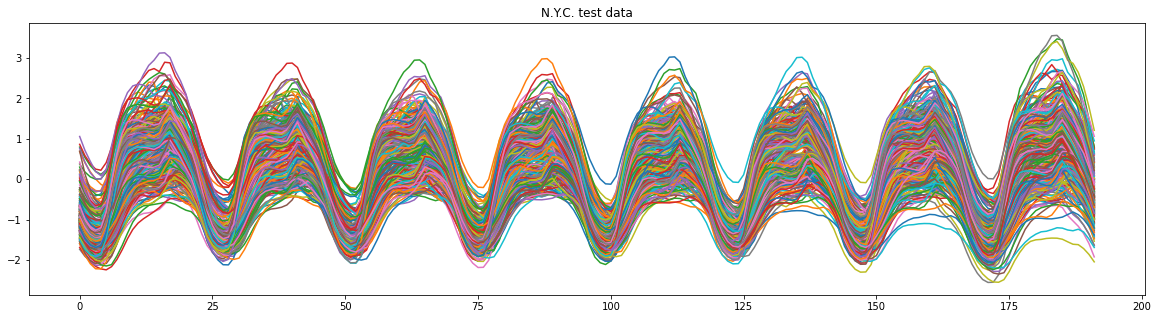

In [39]:
data = np.load('/home/hchuang/Documents/UQ-DL/SSSD/src/datasets/NYISO/8_days/zone/load_array_N.Y.C._test_stdd.npy')
plot_data(data, range(0,358,1), 0, "N.Y.C. test data")
print(data.shape)
# plot_data(data, range(0,1,1), 8, "2019/1/1-2019/1/7")
# plot_data(data, range(31,32,1), 8, "2019/2/1-2019/2/7")

<AxesSubplot:>

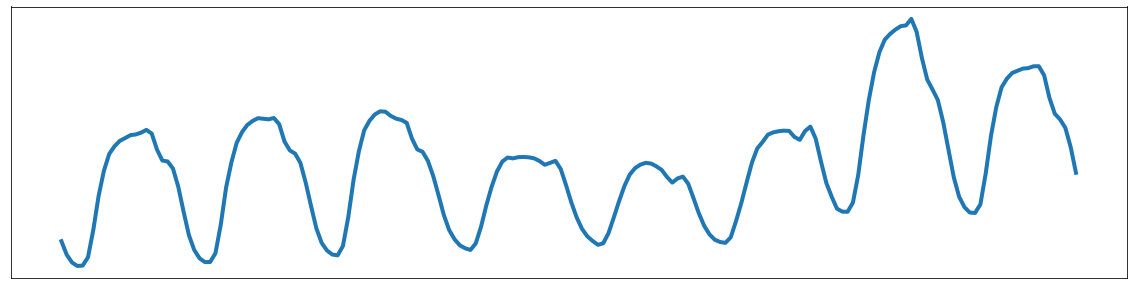

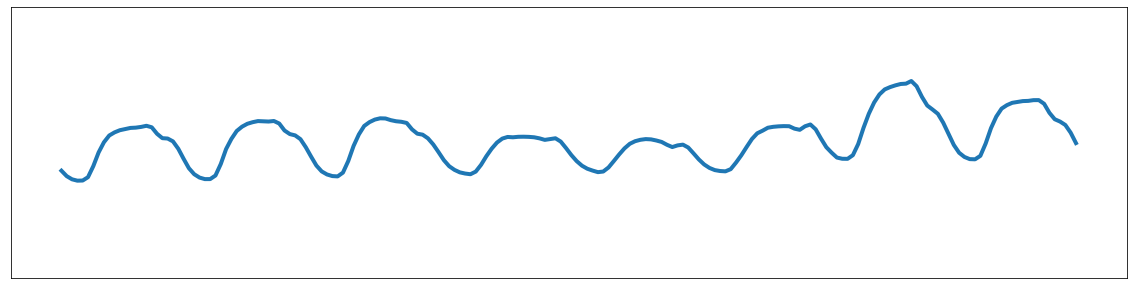

In [5]:

zone_name = ""
index = range(0,1,1)
zone_num = 0
dt = data[index,:,zone_num:(zone_num+1)]


df = pd.DataFrame(np.squeeze(dt, axis=2)).T
df.plot(legend=False, title=zone_name, figsize=(20,5),
        xticks=[], xlabel='', yticks=[], ylabel='',
        lw = 4)

df.plot(legend=False, title=zone_name, figsize=(20,5), 
        xticks=[], xlabel='', yticks=[], ylabel='',
        ylim = [-6,6],
        lw=4)


<AxesSubplot:>

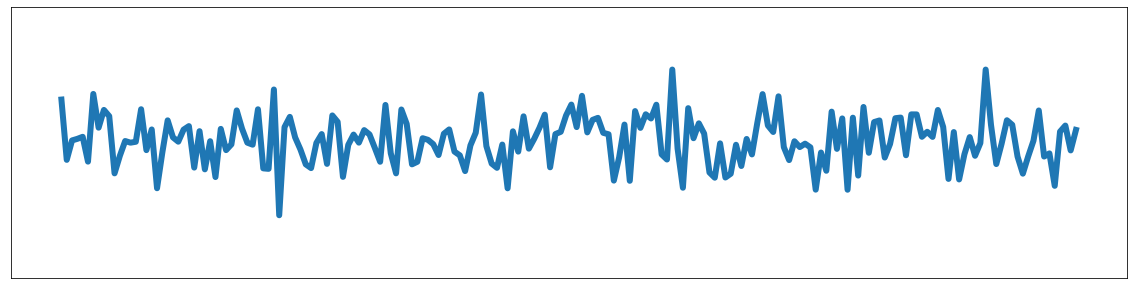

In [69]:
noise = np.random.randn(1, 192, 1)

data = noise[index,:,zone_num:(zone_num+1)]
data = np.squeeze(data, axis=2)
df = pd.DataFrame(data).T
df.plot(legend=False, title=zone_name, figsize=(20,5), 
     xticks=[], xlabel='', yticks=[], ylabel='',
    ylim = [-6,6],
    lw=6)


<AxesSubplot:>

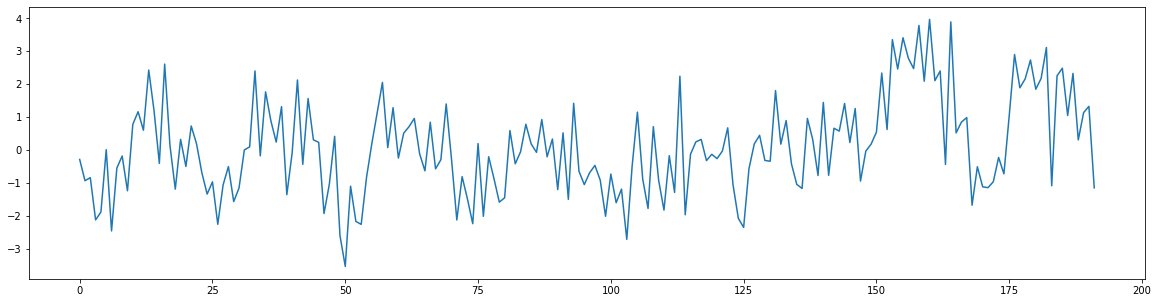

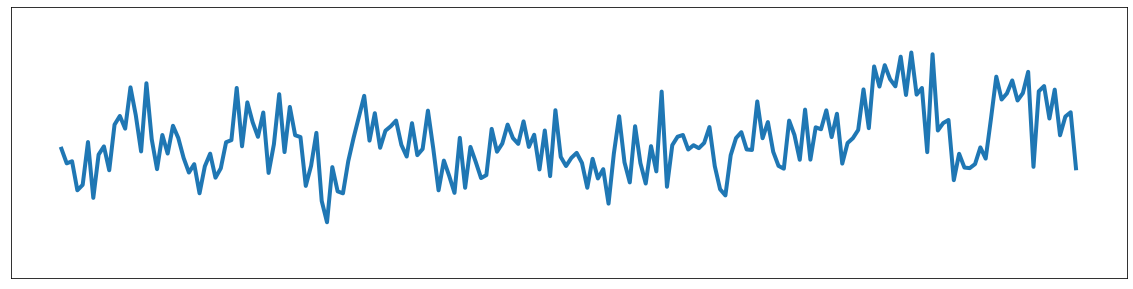

In [66]:
dt = dt + noise

df = pd.DataFrame(np.squeeze(dt, axis=2)).T
df.plot(legend=False, title=zone_name, figsize=(20,5))

df.plot(legend=False, title=zone_name, figsize=(20,5), 
        xticks=[], xlabel='', yticks=[], ylabel='',
        ylim = [-6,6],
        lw=4)

<AxesSubplot:>

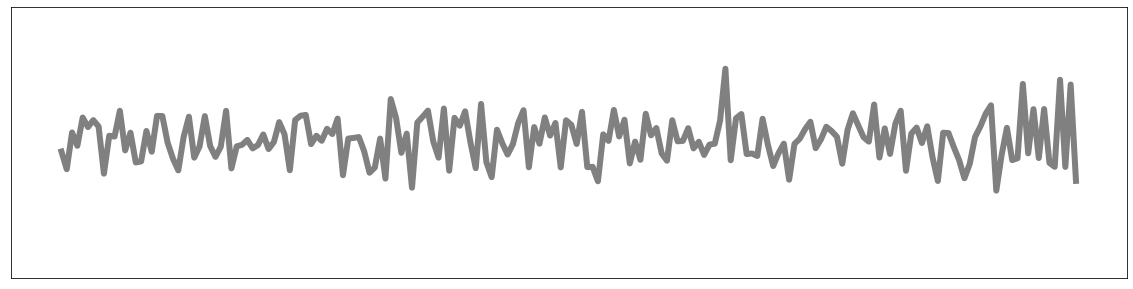

In [67]:
noise = np.random.randn(1, 192, 1)

data = noise[index,:,zone_num:(zone_num+1)]
data = np.squeeze(data, axis=2)
df = pd.DataFrame(data).T
df.plot(legend=False, title=zone_name, figsize=(20,5), 
    color = 'grey', xticks=[], xlabel='', yticks=[], ylabel='',
    ylim = [-6,6],
    lw=6)


<AxesSubplot:>

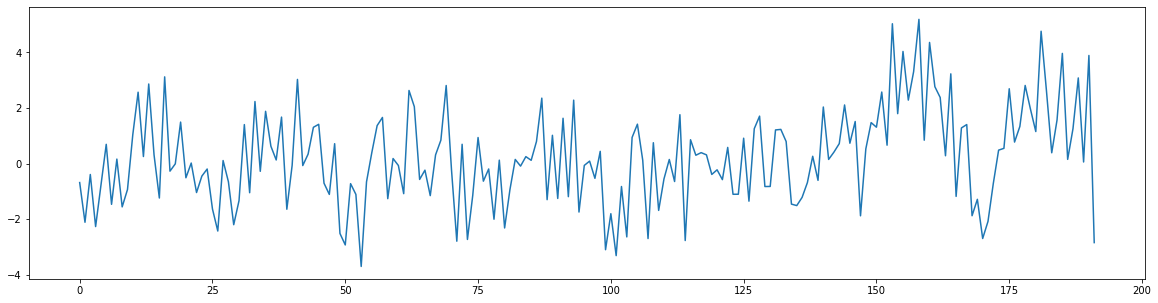

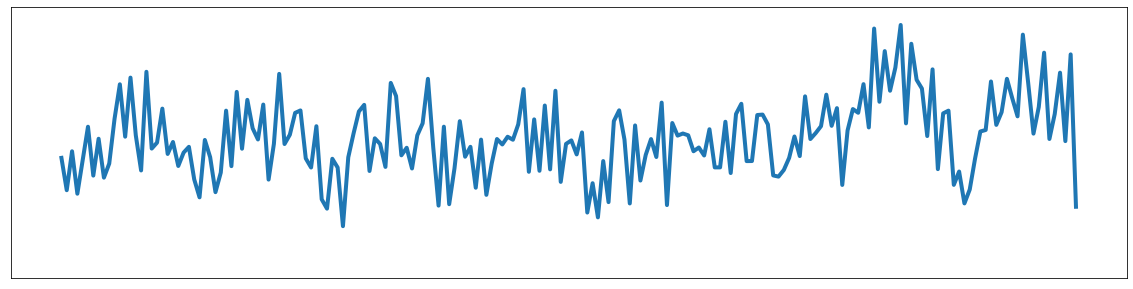

In [68]:
dt = dt + noise

df = pd.DataFrame(np.squeeze(dt, axis=2)).T
df.plot(legend=False, title=zone_name, figsize=(20,5))

df.plot(legend=False, title=zone_name, figsize=(20,5), 
        xticks=[], xlabel='', yticks=[], ylabel='',
        ylim = [-6,6],
        lw=4)

# Results

In [4]:
imputation = np.load('/home/hchuang/Documents/UQ-DL/SSSD/src/results/NYISO_NYC/T200_beta00.0001_betaT0.02/imputation0.npy')
original = np.load('/home/hchuang/Documents/UQ-DL/SSSD/src/results/NYISO_NYC/T200_beta00.0001_betaT0.02/original0.npy')
mask = np.load('/home/hchuang/Documents/UQ-DL/SSSD/src/results/NYISO_NYC/T200_beta00.0001_betaT0.02/mask0.npy')


## 呈現 2019 年資料和預測

(8592,)


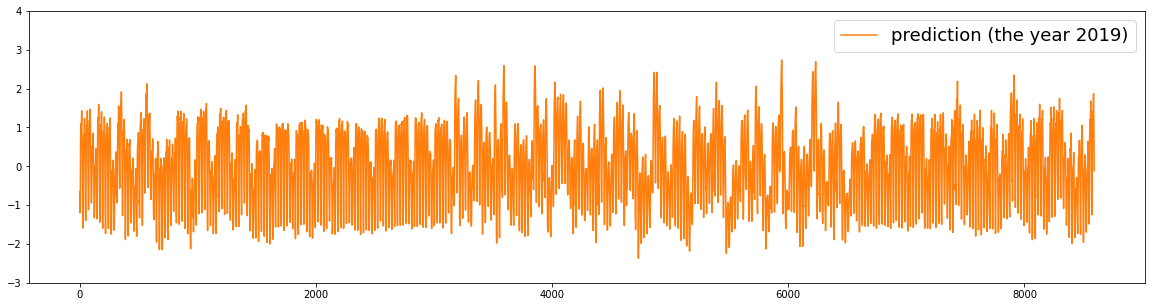

In [8]:
# 取出每個 "358" 中的最後 24 個數值
last_24_values = imputation[:, :, -24:]
# 重新形狀成 (358, 24) 的 array
reshaped_array = last_24_values.reshape((358, 24))
# 串接在一起，形成 8592 的時間序列
result_sequence = reshaped_array.flatten()
# 現在 result_sequence 就是你要的結果
print(result_sequence.shape)
# 畫圖
df = pd.DataFrame(result_sequence)
ax = df.plot(legend=False, title="", figsize=(20,5), ylim = [-3,4], color = 'C1')

ax.legend(["prediction (the year 2019)"], fontsize=18)
plt.show()

imputation_seq = result_sequence

(8592,)


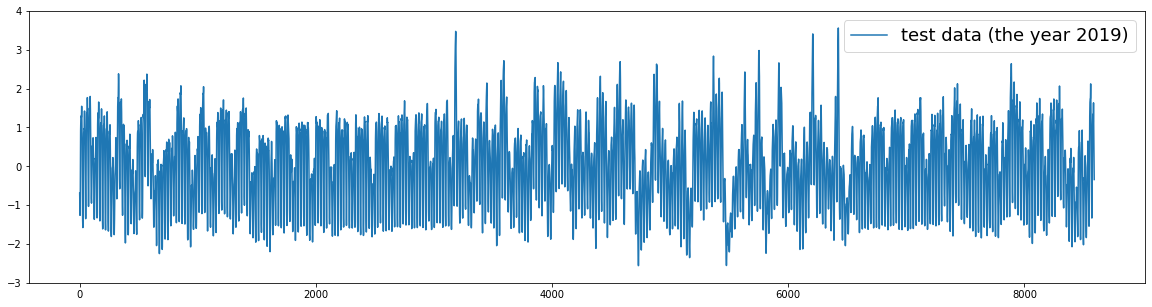

In [9]:
# 取出每個 "358" 中的最後 24 個數值
last_24_values = original[:, :, -24:]
# 重新形狀成 (358, 24) 的 array
reshaped_array = last_24_values.reshape((358, 24))
# 串接在一起，形成 8592 的時間序列
result_sequence = reshaped_array.flatten()
# 現在 result_sequence 就是你要的結果
print(result_sequence.shape)
# 畫圖
df = pd.DataFrame(result_sequence)
ax = df.plot(legend=False, title="", figsize=(20,5), ylim = [-3,4], color = 'C0')
ax.legend(["test data (the year 2019)"], fontsize=18)
plt.show()

original_seq = result_sequence

## 計算 MSE

In [10]:
print(f"MSE：{mean_squared_error(original_seq, imputation_seq)}")


MSE：0.09739141911268234


In [11]:
mse_list = []

# 逐個計算每個子集的 MSE
for i in range(original.shape[0]):
    mse = mean_squared_error(original[i, 0, -24:], imputation[i, 0, -24:])
    mse_list.append(mse)

# 計算平均的 MSE
average_mse = np.mean(mse_list)

print(f"平均 MSE：{average_mse}")

平均 MSE：0.09739140421152115


(358,)


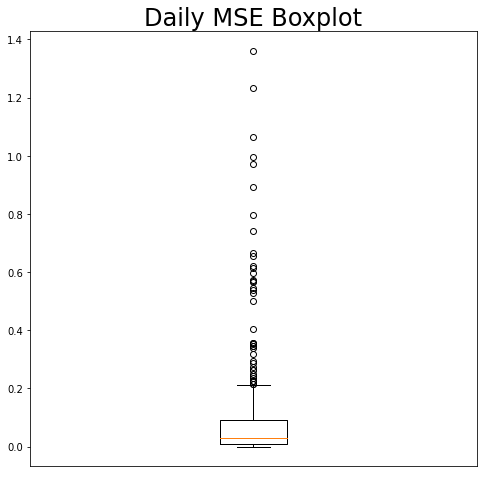

In [12]:
# 將 mse_list 轉換為 NumPy array
mse_array = np.array(mse_list)
print(mse_array.shape)
# 畫箱形圖
plt.figure(figsize = (8,8))
plt.boxplot(mse_array)
plt.title('Daily MSE Boxplot', fontsize=24)
plt.xticks([])
plt.show()

## 找出表現差的天

### MSE 最大的

In [180]:
mse_array = np.array(mse_list)

# 找到最大的三個 MSE 的索引
top_3_indices = np.argsort(mse_array)[-3:]

# 取出最大的三個 MSE 的值和相應的位置
top_3_mse_values = mse_array[top_3_indices]

print("最大的三個 MSE 值：", top_3_mse_values)
print("最大的三個 MSE 位置：", top_3_indices)

最大的三個 MSE 值： [1.0651733 1.2338165 1.3593063]
最大的三個 MSE 位置： [259 196 267]


In [238]:
print(which_date(267))
print(which_date(196))
print(which_date(259))

2019/10/02
2019/07/23
2019/09/24


### 資料 outlier 

In [237]:
# 設定一個閾值，例如找出原始資料大於 threshold 的index和日期
threshold = 3.45

# 使用條件索引找出大於閾值的位置
indices = np.where(result_sequence > threshold)

print("Indices of elements greater than", threshold, ":", indices)
indices = np.array(indices).flatten()
index = np.floor(np.divide(indices,24)) # 屬於第幾天(最小是第0天)
print(index)
print(which_date(index[0]))
print(which_date(index[1]))
print(which_date(index[2]))

Indices of elements greater than 3.45 : (array([3184, 6423, 6424]),)
[132. 267. 267.]
2019/05/20
2019/10/02
2019/10/02


## 給index，呈現該天資料和預測

In [302]:
index = 13
imputation_one = imputation[index,0,:]
mask_one = mask[index,0,:]
original_one = original[index,0,:]

mse = round(mean_squared_error(imputation_one[-24:], original_one[-24:]),2)

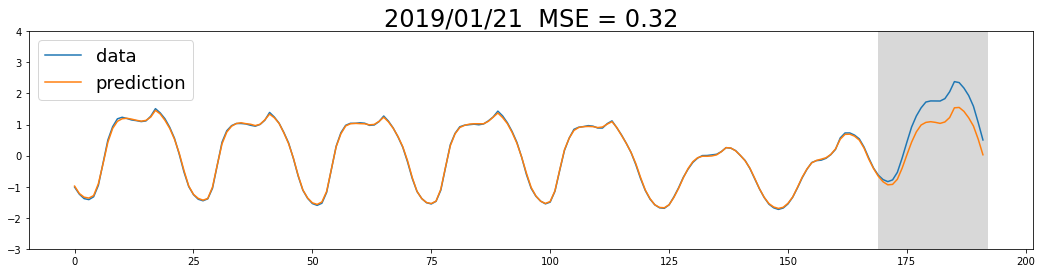

In [303]:
# 創建一個 figure 和一個 axes
fig, ax = plt.subplots(figsize=(18,4))

# 畫 original 的藍色線
ax.plot(original_one, color= 'C0', label='Original')

# 畫 imputation 的橘色線
ax.plot(imputation_one, color='C1', label='Imputation')
ax.set_ylim([-3, 4])
ymin, ymax = ax.get_ylim()

# 將 mask 中為 0 的區域填充成灰色
ax.fill_between(np.arange(1, 193), ymin, ymax, where=(mask_one == 0), facecolor='gray', alpha=0.3, label='Mask (0)')

# 設定 x 軸和 y 軸標籤
ax.set_xlabel('')
ax.set_ylabel('')


# 添加圖例
ax.legend(['data','prediction'], loc='upper left', fontsize = 18)
plt.title(which_date(index) + '  MSE = ' + str(mse), fontsize = 24)
# 顯示圖形
plt.show()